# imports


In [1]:
import gc
gc.collect()

0

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## simple xor data set

In [3]:
# import math
# train_size = 500
# data_x_offset = 20
# data_y_offset = 20
# in_data = [] 
# target_data = []
# for i in range(train_size):
#     theta = np.random.random() * 2 * math.pi
#     radius = np.random.rand() * 0.3
#     if (i < train_size/4):
#         in_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
#         target_data.append([0])
#     elif (i < 2*train_size/4):
#         in_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
#         target_data.append([0])
#     elif(i < 3*train_size/4):
#         in_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
#         target_data.append([1])
#     else:
#         in_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
#         target_data.append([1])

# test_size = round(train_size*0.2)
# in_test_data = [] 
# target_test_data = []
# for i in range(test_size):
#     theta = np.random.random() * 2 * math.pi
#     radius = np.random.rand() * 0.3
#     if (i < test_size/4):
#         in_test_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
#         target_test_data.append([0])
#     elif (i < 2*test_size/4):
#         in_test_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
#         target_test_data.append([0])
#     elif(i < 3*test_size/4):
#         in_test_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
#         target_test_data.append([1])
#     else:
#         in_test_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
#         target_test_data.append([1])

# plt.figure()
# plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title("training data")

# plt.figure()
# plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title("test data")

Text(0.5, 1.0, 'test data')

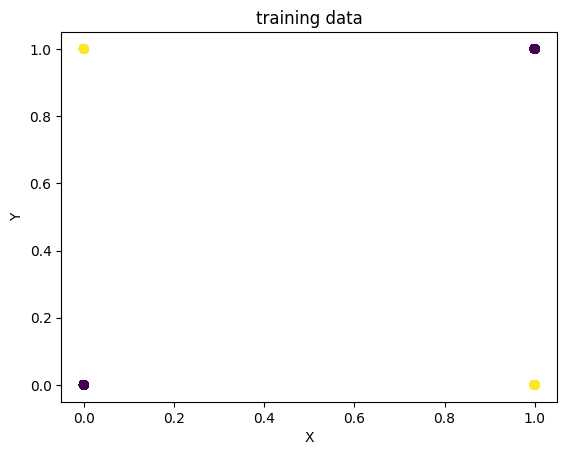

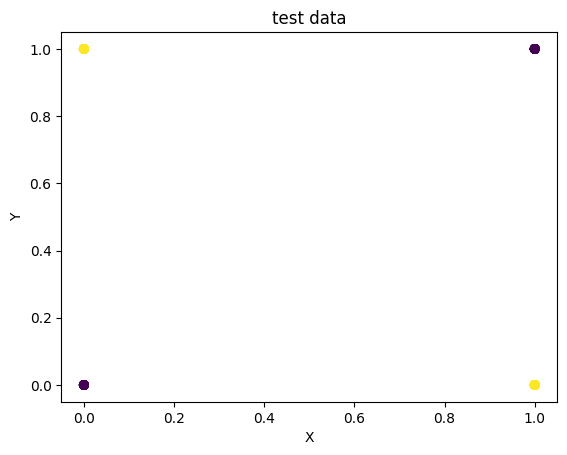

In [4]:
train_size = 1000


in_data = [] 
target_data = []
for i in range(train_size):
    if (i < train_size/2):
        if (i < train_size/4):
            in_data.append([0, 0])
        else:
            in_data.append([1,1])
        target_data.append([0])
    else:
        if (i < 3*train_size/4):
            in_data.append([1, 0])
        else:
            in_data.append([0, 1])
        target_data.append([1])


test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    if (i < test_size/2):
        if (i < test_size/4):
            in_test_data.append([0,0])
        else:
            in_test_data.append([1,1])
        target_test_data.append([0])
    else:
        if (i < 3*test_size/4):
             in_test_data.append([0,1])
        else:
            in_test_data.append([1,0])
        target_test_data.append([1])


plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")


## plastic NN


In [5]:
def Sigmoid(x):
    #print("sig before: ", x)
    res = 1 / (1 + np.exp(-x))
    #print("sig after: ", res)
    return res

def d_Sigmoid(x):
    #print("d sig before: ", x)
    y = x * (1 - x)
    #print("d sig after: ", y)
    return y


def ReLU(x):
   # print("relu before: ", x)
    for each in x:
        each = max(0, each)
    #res = max(0, x.any())
    #print("relu after: ", x)
    return x
    
def d_ReLU(x):
    #print("d relu before: ", x)
    for each in x:
        if (each <= 0):
            each = 0
        else:
            each = 1
        #x[x<=0] = 0
    #x[x>0] = 1
    
    #print("d relu after: ", x)
    return x
    #return y

activations_dict = {
'Sigmoid': [Sigmoid, d_Sigmoid],
'ReLU': [ReLU, d_ReLU],  
}

class layer:
    def __init__(s, lr = 0.1, prev_size = 2, my_size=2, activation_type = "Sigmoid"):
        s.lr = lr
        s.size = my_size
        s.prev_size = prev_size
        s.weights = np.random.random((prev_size, s.size))
        s.funcs = activations_dict.get(activation_type)
        s.activation_f = s.funcs[0]
        s.d_activation_f = s.funcs[1]


    def activate(s, x):
        return s.activation_f(x)
        
    def d_activate(s, x):
        return s.d_activation_f(x)  

    def forward(s, inputs):
        
        s.input = np.asarray(inputs)
        #print("f ", s.input)
        s.neurons = np.dot(s.input, s.weights)
        s.neurons_activated = s.activate(s.neurons)
        
        return s.neurons_activated

    def backprop(s, layer_error): # for output here layer_error = target_val - s.forward
        s.delta = layer_error * s.d_activate(s.neurons_activated)
        
        s.prev_layer_error = np.dot(s.delta, s.weights.T)
        #print("b ", s.input)
        return s.prev_layer_error
        
    def update_weights(s):
        s.input_t = s.input.T
        #print("update input_t: ", s.input)
        #print("delta: ", s.delta.shape)
        
        s.v = s.input_t.reshape((s.input_t.shape[0], 1))
        #print("v: ", s.v.shape)

        s.d = s.delta.reshape((1, s.delta.shape[0]))
        s.weights += s.lr * np.dot(s.v, s.d) # (s.input_t, s.delta)
        
    def print_info(s):
        print("my size: ", s.size)
        print("w: ", s.weights, "\n")
        
    def print_pic(s):
        print("\n╻...\nv...")
        for i in range(s.size):
            print('O\t', end='')
        

    def add_neuron(s):     
        add_w = np.zeros(shape=(s.prev_size, 1), dtype=float) + 0.1
        s.weights = np.concatenate((s.weights, add_w.T))
        s.size+=1




In [6]:

class input_layer:
    def __init__(s, size):
        s.size = size
        s.values = np.zeros(shape=(size), dtype = float)

    def print_info(s):
        print("IN LAYER\nsize: ", s.size)
        print(s.values)

    def print_pic(s):
        for i in range(s.size):
            print("| |\t", end='')
        print("")
        for i in range(s.size):
            print(" v \t", end='')
        print("")
        for i in range(s.size):
            print('@\t', end='')

    def forward(s, x):
        return x
        
        

class plastic_nn:
    def __init__(s):
        s.layers = []
        s.n_of_layers = 0
        
        pass

    def forward(s, data):
        for lay in layers:
            data = lay.forward(data)
        s.last_result = data
        return s.last_result

    def backprop(s, correct):
        err = correct-s.last_result

        for lay in reversed(layers[1:]):
            err = lay.backprop(err)

    def update_w(s):
        cnt = 0
        for lay in reversed(layers[1:]):
            #print(cnt)
            cnt+=1
            lay.update_weights()

    def learn_one(s, in_data, target_data):
        pnn.forward(in_data)

        pnn.backprop(target_data)
        pnn.update_w()   
        
    def append_one(s, new_layer, check = False):
        if check and s.n_of_layers!=0:
            last_layer_size = s.layers[-1].size
            if last_layer_size != new_layer.prev_size:
                print("size not match, layer ", s.n_of_layers)
                return
        s.layers.append(new_layer)
        s.n_of_layers+=1
        pass

    def check_layers_sizes(s, check_layers):
        #print("CHECK")
        for i in range(1, len(check_layers)):
            #print(i)
            #print("check_layers[i-1].size ",check_layers[i-1].size)
            #print("check_layers[i].prev_size ",check_layers[i].prev_size)
            if (check_layers[i-1].size != check_layers[i].prev_size):
                print("error between ", i-1, "and ", i)
                return False
        return True
        
    def append(s, new_layers):
        test_layers = np.array([])
        if s.n_of_layers != 0:
            test_layers = s.layers[-1]
            
        test_layers = np.append(test_layers, new_layers)
                
        if (s.check_layers_sizes(test_layers)):
            for lay in new_layers:
                s.append_one(lay)

            print("added succesfully")
            return True
        else:
            print("ERROR adding layers, check info above")
            return False

    def print_info(s):
        print("Num of layers: ", s.n_of_layers)
        for cnt in range(s.n_of_layers):
            print("#", cnt)
            s.layers[cnt].print_info()
            print("")
    
    def print_pic(s):
        print("Num of layers: ", s.n_of_layers)
        cnt = 0
        for lay in s.layers:
            lay.print_pic()
            print("#", cnt, end='')
            cnt+=1
        print("\nOUT |#|\nOUT  v")



## create pnn

In [7]:
np.random.seed(5)
in_layer = input_layer(2)
tl = layer(lr = 0.01, prev_size = 2, my_size=2, activation_type="ReLU")
out_layer = layer(lr = 0.01, prev_size = 2, my_size=1)

pnn = plastic_nn()
layers = [in_layer, tl, out_layer]

pnn.append(layers)


added succesfully


True

## train and test

to note:

epochs 1000, lr 0.01, rand seed 4

epochs 2000, lr 0.1, rand seed 2

relu before:  [0. 0.]--------------------------------- ]
relu after:  [0. 0.]
sig before:  [0.]
sig after:  [0.5]
d sig before:  [0.5]
d sig after:  [0.25]
d relu before:  [0. 0.]
d relu after:  [0. 0.]
relu before:  [0. 0.]
relu after:  [0. 0.]
sig before:  [0.]
sig after:  [0.5]
d sig before:  [0.5]
d sig after:  [0.25]
d relu before:  [0. 0.]
d relu after:  [0. 0.]
relu before:  [0. 0.]
relu after:  [0. 0.]
sig before:  [0.]
sig after:  [0.5]
d sig before:  [0.5]
d sig after:  [0.25]
d relu before:  [0. 0.]
d relu after:  [0. 0.]
relu before:  [0. 0.]
relu after:  [0. 0.]
sig before:  [0.]
sig after:  [0.5]
d sig before:  [0.5]
d sig after:  [0.25]
d relu before:  [0. 0.]
d relu after:  [0. 0.]
relu before:  [0. 0.]
relu after:  [0. 0.]
sig before:  [0.]
sig after:  [0.5]
d sig before:  [0.5]
d sig after:  [0.25]
d relu before:  [0. 0.]
d relu after:  [0. 0.]
relu before:  [0. 0.]
relu after:  [0. 0.]
sig before:  [0.]
sig after:  [0.5]
d sig before:  [0.5]
d sig after:  [0.25]
d re

Text(0, 0.5, 'error')

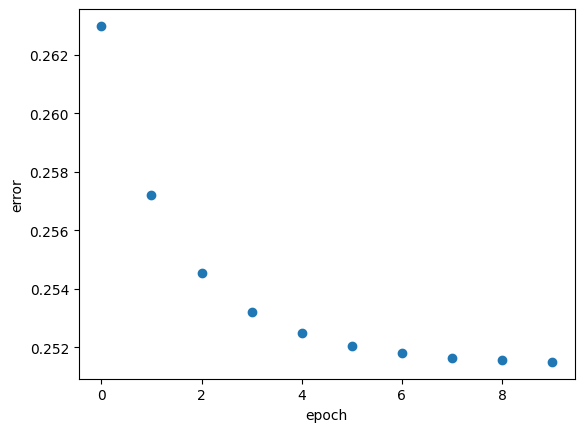

In [8]:
to_display_bar = True

graph_err = []
graph_epoch=[]
epochs = 10
target_data = np.array(target_data)
#print(target_data)

bar_len = 50

def display_bar(bar_len, idx, total):
    idx = int(idx*bar_len/total)
    #print(perc)
    print("[", "-"*idx, "*", "-"*(bar_len-idx-1), "]",end='')
    print("\r",end='')

for i in range(epochs):
    if to_display_bar:
        display_bar(bar_len, i, epochs)
    
    for idx in range(len(in_data)):
        #print("idx ", idx)
        pnn.learn_one(in_data[idx],target_data[idx])



    error_sum = 0
    for idx in range(len(in_test_data)):
        valid_res = pnn.forward(in_test_data[idx])
        error = (target_test_data[idx] - valid_res)**2
        error_sum+=error
    
    graph_err.append(error_sum/len(in_test_data))
    graph_epoch.append(i)



print("graph_epoch ", graph_epoch)
print("(graph_err)", graph_err)
plt.figure()
plt.scatter(graph_epoch, graph_err)
plt.xlabel('epoch')
plt.ylabel('error')


    

In [9]:
test_2_in = [[0,0.1], [0,1], [1, 0], [1,1.1]]
for i in range(4):
    print(pnn.forward(test_2_in[i]))

pnn.print_info()

relu before:  [0.00354504 0.08112574]
relu after:  [0.00354504 0.08112574]
sig before:  [0.01553423]
sig after:  [0.50388348]
[0.50388348]
relu before:  [0.03545039 0.81125745]
relu after:  [0.03545039 0.81125745]
sig before:  [0.15534234]
sig after:  [0.53875768]
[0.53875768]
relu before:  [0.07750145 0.41792853]
relu after:  [0.07750145 0.41792853]
sig before:  [0.1016179]
sig after:  [0.52538264]
[0.52538264]
relu before:  [0.11649688 1.31031172]
relu after:  [0.11649688 1.31031172]
sig before:  [0.27249448]
sig after:  [0.56770519]
[0.56770519]
Num of layers:  3
# 0
IN LAYER
size:  2
[0. 0.]

# 1
my size:  2
w:  [[0.07750145 0.41792853]
 [0.03545039 0.81125745]] 


# 2
my size:  1
w:  [[0.36448297]
 [0.1755562 ]] 




# RL test



In [10]:
# !pip install gym_super_mario_bros==7.4.0 nes_py

In [11]:
# # Import the game
# import gym_super_mario_bros
# import gym

# from nes_py.wrappers import JoypadSpace


# from gym_super_mario_bros.actions import RIGHT_ONLY

# from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [12]:

# ENV_NAME = 'SuperMarioBros-1-1-v0'

# if gym.__version__ < '0.26':
#     print("<0.26")
#     env = gym_super_mario_bros.make(ENV_NAME, render_mode='human', new_step_api=True)
# else:
#     print(">=0.26")
#     env = gym_super_mario_bros.make(ENV_NAME, render_mode='human', apply_api_compatibility=True)
# env = JoypadSpace(env, RIGHT_ONLY) #SIMPLE_MOVEMENT

# done = False
# env.reset()
# counter = 0
# while not done and counter < 100000:
#     # Only go right
#     # action = RIGHT_ONLY.index(['right'])
    
#     # Choose random action
#     action = env.action_space.sample()

#     _, _, done, _, _ = env.step(action)
#     env.render()
#     counter+=1
# env.close()

# RL test cartpole

In [13]:
# !pip install gymnasium
# !pip install gymnasium[classic-control]

In [14]:
# !pip install -q swig

In [15]:
#!pip install gymnasium[box2d]

In [16]:
# import gymnasium as gym
#

In [17]:
# env = gym.make('CartPole-v1', render_mode="human")
# print(env.action_space) # 0 or 1

# observation, info = env.reset(seed=42)
# for _ in range(100):
#    action = env.action_space.sample()  # this is where you would insert your policy
#    observation, reward, terminated, truncated, info = env.step(action)

#    #if terminated:# or truncated:
#       #observation, info = env.reset()

# env.close()

In [18]:
# env.close()